In [1]:
##############################################################################################################
# DESCRIPTION: 
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 320
hyperparams.BATCH_SIZE = 32

hyperparams.LOSS = 'mean_absolute_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0001_0100"
MODEL_NAME = "0001_0100-64-convsim-xc5"

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', MODEL_NAME))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0174
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.8130

from tensorflow.keras.optimizers import Nadam
hyperparams.OPTIMIZER = Nadam(learning_rate=0.0001)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelD as train
import ReportsK as reports
import ConvSimG as model_factory

In [4]:
##################
# MODEL DEFINITION
##################
model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   544         input_1[0][0]                    
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 32, 32, 32)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 16, 16, 16)   8208        activation_4[0][0]               
______________________________________________________________________________________________

{'name': 'Nadam',
 'learning_rate': 0.0001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [5]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = \
        dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

val_noisy_files, val_nitid_files, val_noisy, val_nitid = \
        dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/
Noisy files:8086
Nitid files:8086
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/validation/
Noisy files:2000
Nitid files:2000


In [6]:
##################
# TRAIN MODEL
##################
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

checkpoint_filepath = os.path.abspath(os.path.join('../../../saves/') + MODEL_NAME \
                                      + "_checkpoint_" + '_weights_{epoch:02d}-{val_loss:.2f}')

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid, patience=50, \
                callbacks=[model_checkpoint_callback])

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6

Epoch 1/320
253/253 [==============================] - 9s 18ms/step - loss: 0.0567 - val_loss: 0.0558
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc5_checkpoint__weights_01-0.06\assets
Epoch 2/320
  5/253 [..............................] - ETA: 8s - loss: 0.0497

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 16ms/step - loss: 0.0430 - val_loss: 0.0475
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc5_checkpoint__weights_02-0.05\assets
Epoch 3/320
  5/253 [..............................] - ETA: 8s - loss: 0.0403

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 18ms/step - loss: 0.0381 - val_loss: 0.0454
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc5_checkpoint__weights_03-0.05\assets
Epoch 4/320
  5/253 [..............................] - ETA: 8s - loss: 0.0371

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 17ms/step - loss: 0.0371 - val_loss: 0.0449
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc5_checkpoint__weights_04-0.04\assets
Epoch 5/320
  3/253 [..............................] - ETA: 10s - loss: 0.0403

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 15ms/step - loss: 0.0366 - val_loss: 0.0454
Epoch 6/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0362 - val_loss: 0.0442
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc5_checkpoint__weights_06-0.04\assets
Epoch 7/320
  5/253 [..............................] - ETA: 7s - loss: 0.0342

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 15ms/step - loss: 0.0360 - val_loss: 0.0440
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc5_checkpoint__weights_07-0.04\assets
Epoch 8/320
  3/253 [..............................] - ETA: 8s - loss: 0.0366

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 15ms/step - loss: 0.0358 - val_loss: 0.0442
Epoch 9/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0357 - val_loss: 0.0436
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc5_checkpoint__weights_09-0.04\assets
Epoch 10/320
  4/253 [..............................] - ETA: 9s - loss: 0.0384

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 15ms/step - loss: 0.0356 - val_loss: 0.0443
Epoch 11/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0354 - val_loss: 0.0428
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc5_checkpoint__weights_11-0.04\assets
Epoch 12/320
  3/253 [..............................] - ETA: 10s - loss: 0.0360

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 16ms/step - loss: 0.0354 - val_loss: 0.0428
Epoch 13/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0352 - val_loss: 0.0444
Epoch 14/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0352 - val_loss: 0.0438
Epoch 15/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0351 - val_loss: 0.0446
Epoch 16/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0350 - val_loss: 0.0438
Epoch 17/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0349 - val_loss: 0.0451
Epoch 18/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0349 - val_loss: 0.0434
Epoch 19/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0348 - val_loss: 0.0437
Epoch 20/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0347 - val_loss: 0.0425
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 15ms/step - loss: 0.0347 - val_loss: 0.0427
Epoch 22/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0346 - val_loss: 0.0421
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc5_checkpoint__weights_22-0.04\assets
Epoch 23/320
  5/253 [..............................] - ETA: 8s - loss: 0.0336

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 15ms/step - loss: 0.0345 - val_loss: 0.0428
Epoch 24/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0344 - val_loss: 0.0440
Epoch 25/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0344 - val_loss: 0.0425
Epoch 26/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0343 - val_loss: 0.0424
Epoch 27/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0343 - val_loss: 0.0435
Epoch 28/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0342 - val_loss: 0.0429
Epoch 29/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0342 - val_loss: 0.0421
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc5_checkpoint__weights_29-0.04\assets
Epoch 30/320
  5/253 [..............................] - ETA: 7s - loss: 0.0347

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 16ms/step - loss: 0.0341 - val_loss: 0.0424
Epoch 31/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0341 - val_loss: 0.0416
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc5_checkpoint__weights_31-0.04\assets
Epoch 32/320
  5/253 [..............................] - ETA: 7s - loss: 0.0335

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 17ms/step - loss: 0.0341 - val_loss: 0.0415
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc5_checkpoint__weights_32-0.04\assets
Epoch 33/320
  3/253 [..............................] - ETA: 10s - loss: 0.0329

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 15ms/step - loss: 0.0340 - val_loss: 0.0436
Epoch 34/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0340 - val_loss: 0.0428
Epoch 35/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0339 - val_loss: 0.0436
Epoch 36/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0339 - val_loss: 0.0422
Epoch 37/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0339 - val_loss: 0.0429
Epoch 38/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0338 - val_loss: 0.0424
Epoch 39/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0338 - val_loss: 0.0431
Epoch 40/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0338 - val_loss: 0.0422
Epoch 41/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0337 - val_loss: 0.0427
Epoch 42/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0337 - 

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 15ms/step - loss: 0.0335 - val_loss: 0.0423
Epoch 54/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0334 - val_loss: 0.0429
Epoch 55/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0334 - val_loss: 0.0418
Epoch 56/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0334 - val_loss: 0.0423
Epoch 57/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0333 - val_loss: 0.0426
Epoch 58/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0333 - val_loss: 0.0419
Epoch 59/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0333 - val_loss: 0.0414
Epoch 60/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0333 - val_loss: 0.0425
Epoch 61/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0333 - val_loss: 0.0415
Epoch 62/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0333 - 

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 15ms/step - loss: 0.0330 - val_loss: 0.0429
Epoch 79/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0330 - val_loss: 0.0421
Epoch 80/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0330 - val_loss: 0.0424
Epoch 81/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0329 - val_loss: 0.0414
Epoch 82/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0329 - val_loss: 0.0425
Epoch 83/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0329 - val_loss: 0.0431
Epoch 84/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0329 - val_loss: 0.0423
Epoch 85/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0329 - val_loss: 0.0417
Epoch 86/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0329 - val_loss: 0.0422
Epoch 87/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0329 - 

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 15ms/step - loss: 0.0327 - val_loss: 0.0417
Epoch 94/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0328 - val_loss: 0.0425
Epoch 95/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0328 - val_loss: 0.0414
Epoch 96/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0327 - val_loss: 0.0416
Epoch 97/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0327 - val_loss: 0.0412
Epoch 98/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0327 - val_loss: 0.0417
Epoch 99/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0327 - val_loss: 0.0432
Epoch 100/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0327 - val_loss: 0.0416
Epoch 101/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0327 - val_loss: 0.0425
Epoch 102/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0326

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 15ms/step - loss: 0.0326 - val_loss: 0.0427
Epoch 108/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0326 - val_loss: 0.0417
Epoch 109/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0326 - val_loss: 0.0423
Epoch 110/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0326 - val_loss: 0.0416
Epoch 111/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0325 - val_loss: 0.0423
Epoch 112/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0325 - val_loss: 0.0414
Epoch 113/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0326 - val_loss: 0.0423
Epoch 114/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0325 - val_loss: 0.0423
Epoch 115/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0325 - val_loss: 0.0419
Epoch 116/320
253/253 [==============================] - 4s 16ms/step - loss: 

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 15ms/step - loss: 0.0325 - val_loss: 0.0425
Epoch 119/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0325 - val_loss: 0.0414
Epoch 120/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0325 - val_loss: 0.0423
Epoch 121/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0325 - val_loss: 0.0432
Epoch 122/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0324 - val_loss: 0.0415
Epoch 123/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0325 - val_loss: 0.0415
Epoch 124/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0325 - val_loss: 0.0414
Epoch 125/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0324 - val_loss: 0.0410
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc5_checkpoint__weights_125-0.04\assets
Epoch 126/320
  4/253 [..............................] 

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 15ms/step - loss: 0.0324 - val_loss: 0.0442
Epoch 127/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0324 - val_loss: 0.0417
Epoch 128/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0324 - val_loss: 0.0424
Epoch 129/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0324 - val_loss: 0.0424
Epoch 130/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0324 - val_loss: 0.0427
Epoch 131/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0324 - val_loss: 0.0426
Epoch 132/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0324 - val_loss: 0.0416
Epoch 133/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0324 - val_loss: 0.0410
Epoch 134/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0323 - val_loss: 0.0428
Epoch 135/320
253/253 [==============================] - 4s 15ms/step - loss: 

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


253/253 [==============================] - 4s 15ms/step - loss: 0.0322 - val_loss: 0.0423
Epoch 160/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0321 - val_loss: 0.0419
Epoch 161/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0321 - val_loss: 0.0435
Epoch 162/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0321 - val_loss: 0.0429
Epoch 163/320
253/253 [==============================] - 4s 16ms/step - loss: 0.0321 - val_loss: 0.0425
Epoch 164/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0320 - val_loss: 0.0422
Epoch 165/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0320 - val_loss: 0.0411
Epoch 166/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0321 - val_loss: 0.0416
Epoch 167/320
253/253 [==============================] - 4s 15ms/step - loss: 0.0320 - val_loss: 0.0442
Epoch 168/320
253/253 [==============================] - 4s 15ms/step - loss: 

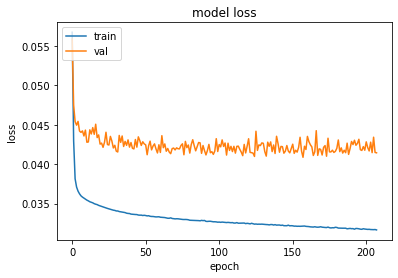

Best Epoch:158


In [7]:
##################
# REPORTS
##################
reports.plotHistory( hist )

In [8]:
model.save(os.path.abspath(os.path.join('../../../saves/', MODEL_NAME)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0100-64-convsim-xc5\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [9]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Images count =2000
Best RMSENZ  =1933 (0.97)
Best MAENZ   =1870 (0.94)
Best PSNR    =1933 (0.97)
Best Accuracy=1598 (0.80)
RMSE-NZ  Pred=0.0520  Noisy=0.1151
MAE-NZ   Pred=0.0439  Noisy=0.0945
PSNR     Pred=11.3 dB Noisy=5.1 dB
Accuracy Pred=0.23    Noisy=0.12
SSM      Pred=0.85    Noisy=0.30
HOG MSE  Pred=0.11    Noisy=0.15


In [10]:
reports.saveMetrics( DEST_TESTS, MODEL_NAME, predictions_headers, predictions_metrics )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test/
Noisy files:15
Nitid files:15
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_06_00_0_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_06_00_0_nitid_idx076.tif


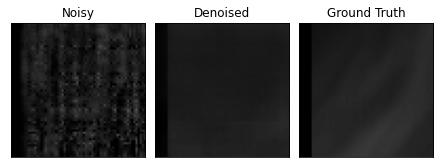

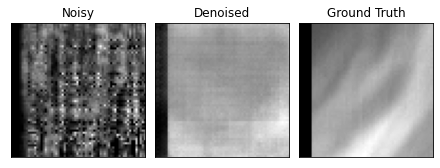

RMSE-NZ  Pred=0.0402  Noisy=0.0762 BEST
MAE-NZ   Pred=0.0337  Noisy=0.0607 BEST
PSNR     Pred=14.8 dB Noisy=9.3 dB BEST
Accuracy Pred=0.14    Noisy=0.11 BEST
SSM      Pred=0.89    Noisy=0.42
HOG MSE  Pred=0.07    Noisy=0.15
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_00_9_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_00_9_nitid_idx076.tif


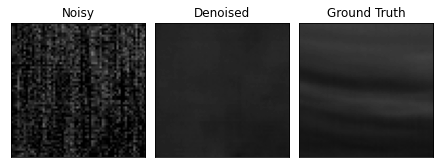

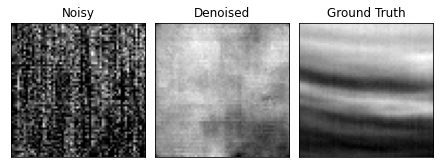

RMSE-NZ  Pred=0.0496  Noisy=0.1043 BEST
MAE-NZ   Pred=0.0417  Noisy=0.0869 BEST
PSNR     Pred=14.1 dB Noisy=7.7 dB BEST
Accuracy Pred=0.12    Noisy=0.06 BEST
SSM      Pred=0.89    Noisy=0.13
HOG MSE  Pred=0.34    Noisy=0.22
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_01_11_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_01_11_nitid_idx076.tif


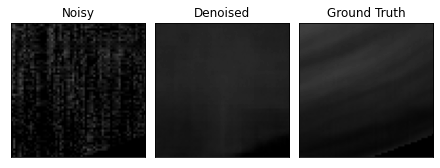

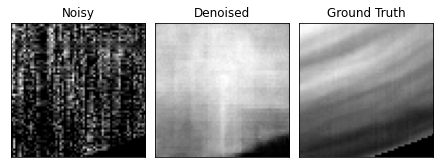

RMSE-NZ  Pred=0.0394  Noisy=0.0960 BEST
MAE-NZ   Pred=0.0320  Noisy=0.0800 BEST
PSNR     Pred=16.1 dB Noisy=8.4 dB BEST
Accuracy Pred=0.21    Noisy=0.06 BEST
SSM      Pred=0.85    Noisy=0.21
HOG MSE  Pred=0.14    Noisy=0.21
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_01_2_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_01_2_nitid_idx076.tif


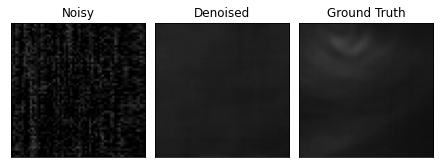

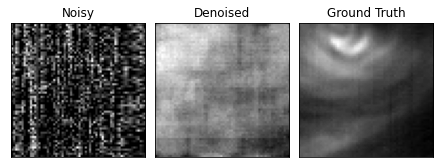

RMSE-NZ  Pred=0.0292  Noisy=0.0938 BEST
MAE-NZ   Pred=0.0225  Noisy=0.0805 BEST
PSNR     Pred=19.3 dB Noisy=9.1 dB BEST
Accuracy Pred=0.27    Noisy=0.06 BEST
SSM      Pred=0.91    Noisy=0.19
HOG MSE  Pred=0.12    Noisy=0.11
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0361_04_00_15_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0361_04_00_15_nitid_idx076.tif


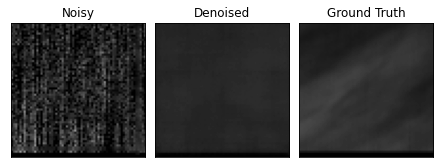

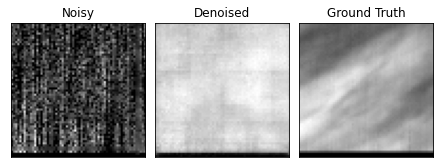

RMSE-NZ  Pred=0.0472  Noisy=0.1126 BEST
MAE-NZ   Pred=0.0397  Noisy=0.0917 BEST
PSNR     Pred=15.7 dB Noisy=8.1 dB BEST
Accuracy Pred=0.11    Noisy=0.07 BEST
SSM      Pred=0.84    Noisy=0.13
HOG MSE  Pred=0.06    Noisy=0.27
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0361_04_01_7_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0361_04_01_7_nitid_idx076.tif


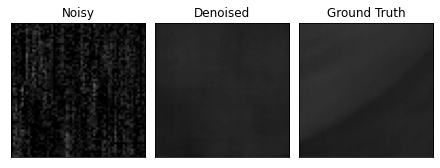

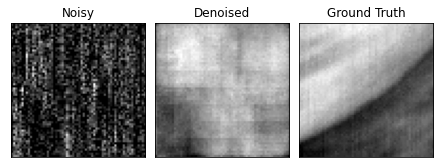

RMSE-NZ  Pred=0.0342  Noisy=0.1147 BEST
MAE-NZ   Pred=0.0274  Noisy=0.1006 BEST
PSNR     Pred=15.7 dB Noisy=5.2 dB BEST
Accuracy Pred=0.23    Noisy=0.05 BEST
SSM      Pred=0.89    Noisy=0.16
HOG MSE  Pred=0.17    Noisy=0.19
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0362_04_01_15_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0362_04_01_15_nitid_idx076.tif


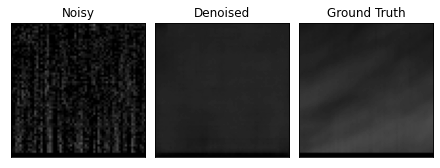

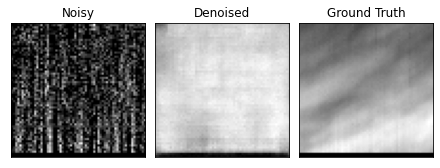

RMSE-NZ  Pred=0.0659  Noisy=0.1357 BEST
MAE-NZ   Pred=0.0489  Noisy=0.1172 BEST
PSNR     Pred=12.9 dB Noisy=6.6 dB BEST
Accuracy Pred=0.20    Noisy=0.04 BEST
SSM      Pred=0.85    Noisy=0.17
HOG MSE  Pred=0.05    Noisy=0.25
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0363_00_00_0_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0363_00_00_0_nitid_idx076.tif


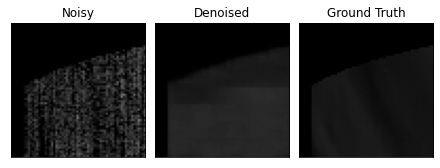

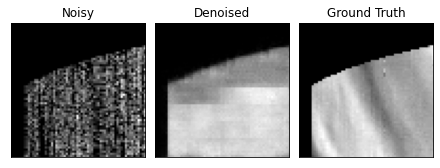

RMSE-NZ  Pred=0.0534  Noisy=0.1015 BEST
MAE-NZ   Pred=0.0430  Noisy=0.0807 BEST
PSNR     Pred=6.8 dB Noisy=1.2 dB BEST
Accuracy Pred=0.26    Noisy=0.10 BEST
SSM      Pred=0.86    Noisy=0.44
HOG MSE  Pred=0.09    Noisy=0.08
******************************************************
Index:8
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_01_01_8_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_01_01_8_nitid_idx076.tif


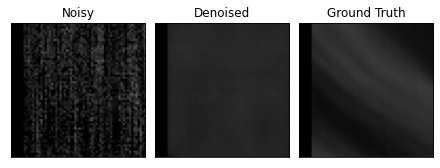

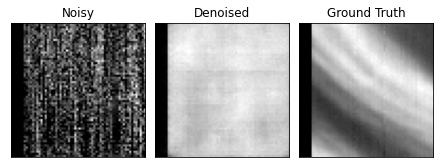

RMSE-NZ  Pred=0.0504  Noisy=0.0960 BEST
MAE-NZ   Pred=0.0427  Noisy=0.0792 BEST
PSNR     Pred=13.1 dB Noisy=7.5 dB BEST
Accuracy Pred=0.15    Noisy=0.07 BEST
SSM      Pred=0.81    Noisy=0.23
HOG MSE  Pred=0.13    Noisy=0.20
******************************************************
Index:9
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_02_01_9_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_02_01_9_nitid_idx076.tif


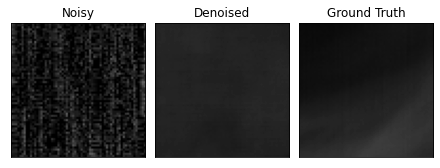

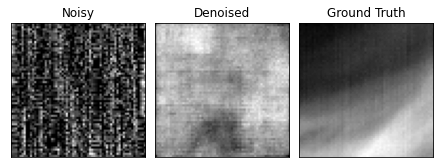

RMSE-NZ  Pred=0.0609  Noisy=0.0971 BEST
MAE-NZ   Pred=0.0530  Noisy=0.0798 BEST
PSNR     Pred=12.1 dB Noisy=8.0 dB BEST
Accuracy Pred=0.10    Noisy=0.07 BEST
SSM      Pred=0.80    Noisy=0.14
HOG MSE  Pred=0.10    Noisy=0.15
******************************************************
Index:10
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_03_00_9_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_03_00_9_nitid_idx076.tif


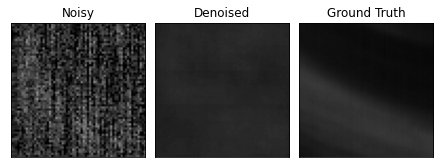

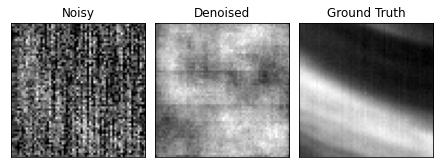

RMSE-NZ  Pred=0.0686  Noisy=0.1540 BEST
MAE-NZ   Pred=0.0604  Noisy=0.1226 BEST
PSNR     Pred=10.3 dB Noisy=3.3 dB BEST
Accuracy Pred=0.06    Noisy=0.05 BEST
SSM      Pred=0.73    Noisy=0.08
HOG MSE  Pred=0.24    Noisy=0.19
******************************************************
Index:11
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0569_02_01_11_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0569_02_01_11_nitid_idx076.tif


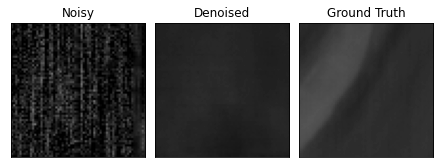

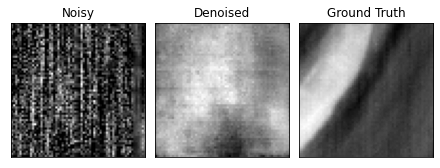

RMSE-NZ  Pred=0.0823  Noisy=0.1426 BEST
MAE-NZ   Pred=0.0663  Noisy=0.1207 BEST
PSNR     Pred=12.1 dB Noisy=7.4 dB BEST
Accuracy Pred=0.07    Noisy=0.04 BEST
SSM      Pred=0.76    Noisy=0.13
HOG MSE  Pred=0.19    Noisy=0.19
******************************************************
Index:12
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0571_02_01_10_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0571_02_01_10_nitid_idx076.tif


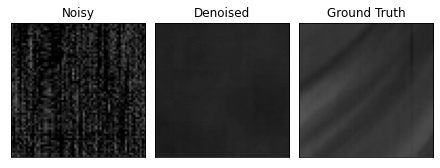

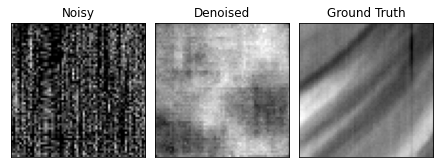

RMSE-NZ  Pred=0.0851  Noisy=0.1416 BEST
MAE-NZ   Pred=0.0745  Noisy=0.1219 BEST
PSNR     Pred=12.0 dB Noisy=7.5 dB BEST
Accuracy Pred=0.04    Noisy=0.04 WORST
SSM      Pred=0.74    Noisy=0.12
HOG MSE  Pred=0.22    Noisy=0.27
******************************************************
Index:13
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0571_03_00_11_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0571_03_00_11_nitid_idx076.tif


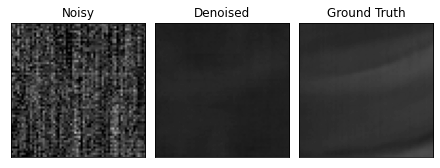

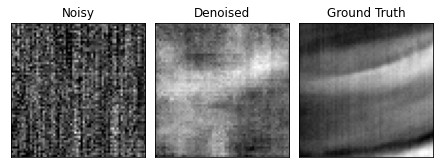

RMSE-NZ  Pred=0.0681  Noisy=0.1312 BEST
MAE-NZ   Pred=0.0619  Noisy=0.1051 BEST
PSNR     Pred=12.9 dB Noisy=7.2 dB BEST
Accuracy Pred=0.00    Noisy=0.05 WORST
SSM      Pred=0.84    Noisy=0.07
HOG MSE  Pred=0.13    Noisy=0.18
******************************************************
Index:14
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0706_02_01_3_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0706_02_01_3_nitid_idx076.tif


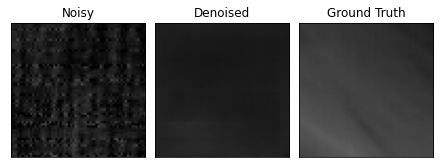

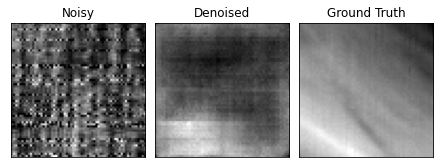

RMSE-NZ  Pred=0.1347  Noisy=0.1634 BEST
MAE-NZ   Pred=0.1291  Noisy=0.1488 BEST
PSNR     Pred=8.6 dB Noisy=7.0 dB BEST
Accuracy Pred=0.00    Noisy=0.01 WORST
SSM      Pred=0.70    Noisy=0.36
HOG MSE  Pred=0.08    Noisy=0.12
******************************************************


In [11]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = \
    dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid = \
    dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )